# Decision Trees

Decision trees are a straightforward model type that is the basis for some of the most powerful models in machine learning.

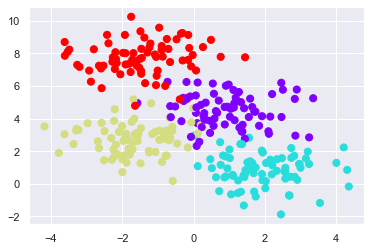

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
sns.set()

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it.
This figure presents a visualization of the first four levels of a decision tree classifier for this data:

/Users/mranger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


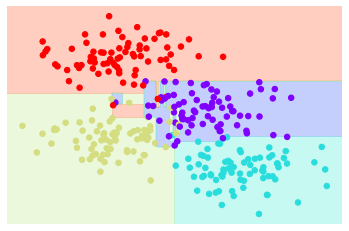

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
visualize_classifier(DecisionTreeClassifier(), X, y)

Notice that as the depth increases, we tend to get very strangely shaped classification regions; for example, at a depth of five, there is a tall and skinny purple region between the yellow and blue regions.
It's clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise properties of the data.
That is, this decision tree, even at only five levels deep, is clearly over-fitting our data.

/Users/mranger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


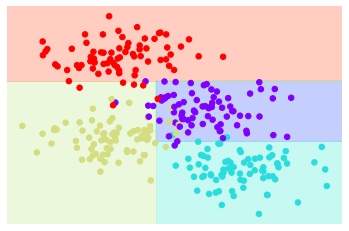

In [19]:
visualize_classifier(DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4), X, y)

/Users/mranger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


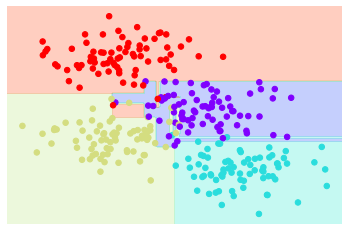

In [17]:
visualize_classifier(DecisionTreeClassifier(max_depth=50, max_leaf_nodes=50), X, y)

### overfitting

Overfitting is a fundamental property of decision trees.

The key intuition to make these types of models better is to use **many bad models** rather than one strong one.

# Random Forests

Multiple overfitting estimators can be combined to average out into a good prediction. This is called **bagging**

Bagging makes use of an ensemble of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.

An ensemble of randomized decision trees is known as a *random forest*.

This type of bagging classification can be done manually using Scikit-Learn's ``BaggingClassifier`` meta-estimator, as shown here:

# Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called *bagging*.
Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.
An ensemble of randomized decision trees is known as a *random forest*.

This type of bagging classification can be done manually using Scikit-Learn's ``BaggingClassifier`` meta-estimator, as shown here:

/Users/mranger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


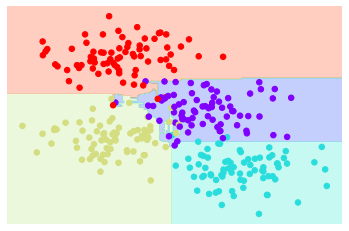

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

In this example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points.

In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness.

/Users/mranger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


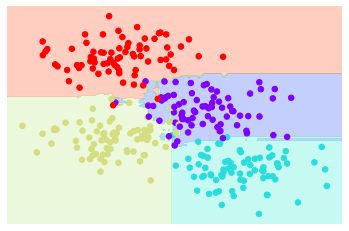

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

# Gradient Boosted Decision Trees

The most popular libraries in this class of models are LightGBM, XGBoost and CatBoost.

These models are extremely popular because they are both powerful and fast to train. LightGBM is in fact the most used library in winning submissions on Kaggle!

LightGBM supports random forests as well, but GBDTs are the most interesting one.

GBDTs are similar to random forests, except they train trees one after the other, minimizing the **residual loss** (the difference between predicted quantities up to now and target) on each step.

/Users/mranger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


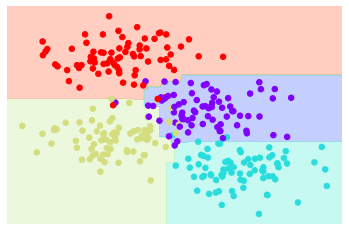

In [30]:
import lightgbm as lgbm

model = lgbm.LGBMClassifier(
    boosting_type='goss',
    num_leaves=15,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=20,
)
visualize_classifier(model, X, y);

One disadvantage of GBDT models is that they have **many, many settings**. [Here](https://lightgbm.readthedocs.io/en/latest/Parameters.html) is a page going over them. [here](https://neptune.ai/blog/lightgbm-parameters-guide) is a good resource on tuning them.

In practice, you generally end up aggressively gridsearching over GBDTs.